In [1]:
import librosa
import os 
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd


/home/vipin/.local/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [7]:
DATA_DIR = './cats_dogs/train'
CATEGORIES = os.listdir(DATA_DIR)
print(CATEGORIES)
sr = 22050

['dog', 'cat']


In [19]:
data = []
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    class_num = CATEGORIES.index(category)
    for audio in os.listdir(path):
        try:
            x,sr = librosa.load(os.path.join(path,audio), sr=sr)
            data.append([x,class_num])
        except Exception as E:
            pass

In [28]:
np.shape(data)

(210, 2)

In [25]:
X = []
Y = []
for feature,label in data:
    X.append(feature)
    Y.append(label)


In [26]:
np.shape(X)

(210,)

In [27]:
np.shape(Y)

(210,)

In [35]:
val = np.random.randint(0, len(Y), 12)
for value in val:
    print(CATEGORIES[Y[value]])
    ipd.display(ipd.Audio(X[value], rate=sr))
    

dog


cat


dog


cat


dog


cat


cat


dog


cat


dog


dog


dog


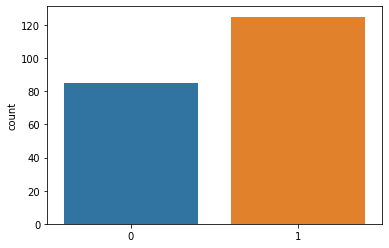

In [37]:
import seaborn as sns
sns.countplot(Y)
plt.show()

In [38]:
from keras.utils import to_categorical
Y = to_categorical(Y)

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [41]:
DATA_DIR = './cats_dogs/test'
CATEGORIES = os.listdir(DATA_DIR)
sr = 22050
data_test = []
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    class_num = CATEGORIES.index(category)
    for audio in os.listdir(path):
        try:
            x,sr = librosa.load(os.path.join(path,audio), sr=sr)
            data_test.append([x,class_num])
        except Exception as E:
            pass

In [42]:
np.shape(data_test)

(67, 2)

In [43]:
X_test = []
Y_test = []
for feature,label in data_test:
    X_test.append(feature)
    Y_test.append(label)


In [44]:
Y = to_categorical(Y)

In [47]:
np.shape(X)

(210,)

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Flatten,Dense,Dropout
model = Sequential()
model.add(Conv1D(64, 3,activation='relu',data_format='channels_last', input_shape=(210,1)))
model.add(MaxPool1D(pool_size=(2)))
model.add(Conv1D(32, 3, activation='relu', data_format='channels_last'))
model.add(MaxPool1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Dense(2, activation='softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 208, 64)           256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 104, 64)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 102, 32)           6176      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 51, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1632)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                104512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)              

In [51]:
model.fit(X,Y,batch_size=32,epochs=5)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 210 arrays: [array([[ 9.7154763e-05],
       [ 3.3907546e-04],
       [-5.2529784e-05],
       ...,
       [-1.1704923e-03],
       [-8.7032706e-04],
       [ 0.0000000e+00]], dtype=float32), array([[-2.60101097e...